In [1]:
include("PVCR.jl");

┌ Info: Recompiling stale cache file /Users/jdlara/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/jdlara/.julia/compiled/v1.1/Roots/o0Xsi.ji for Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1184


## Residential Consumers
#### Generate Data and plot basic results. 

In [2]:
consumption_res = 300:50:1800
ui_res = []
ui_data_res = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_res)
    Result = Dict{String,Any}()
    residential.econsumption = co; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVRes_opt = deepcopy(PVRes) 
    PVRes_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(residential, PVRes_opt, SD);
    ui_data_res[co] = Result  
end

In [3]:
cumulative_impact_res = [sum(ui_data_res[i]["Impact"])./1e6 for i in consumption_res];

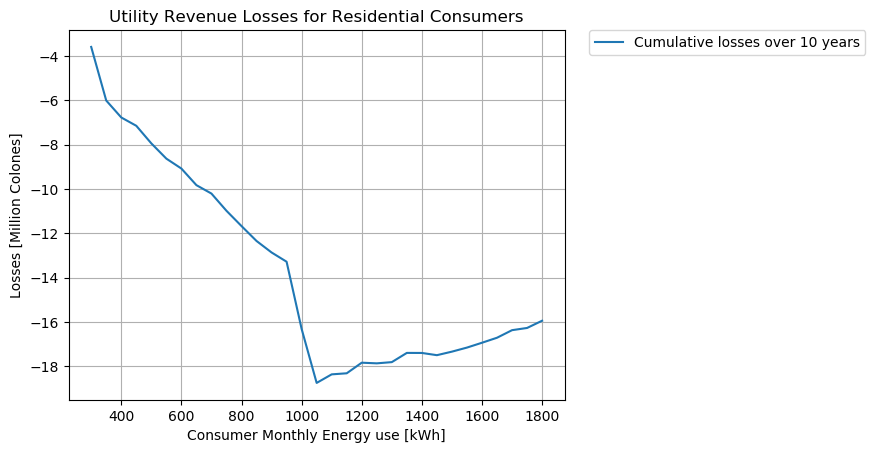

In [4]:
plot(consumption_res, cumulative_impact_res, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Residential Consumers")
grid("on");

## Commercial Consumers
#### Generate Data and plot basic results. 

In [5]:
consumption_comind = consumption = exp10.(range(2.7, stop=4, length=150))
ui_comind = []
ui_data_comind = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_comind)
    Result = Dict{String,Any}()
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(commercial, PVComInd_opt, SD);
    ui_data_comind[ix] = Result  
end

In [6]:
cumulative_impact_comind = [sum(ui_data_comind[ix]["Impact"])./1e6 for (ix, co) in enumerate(consumption_comind)];

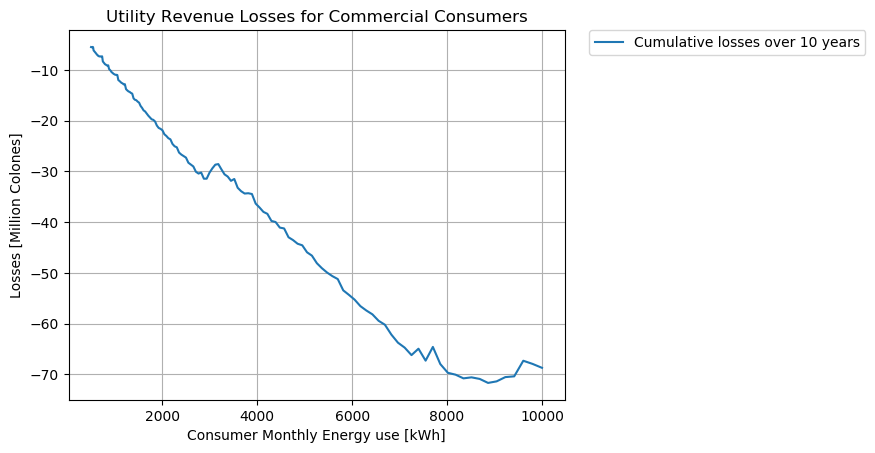

In [7]:
plot(consumption_comind, cumulative_impact_comind, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers")
grid("on");

## Medium Voltage Consumers
#### Generate Data and plot basic results.

In [8]:
consumption_tmt = exp10.(range(4, stop=6, length=150))
ui_tmt = []
ui_data_tmt = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_tmt)
    Result = Dict{String,Any}()
    mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(mediumvoltage, PVTMT_opt, SD);
    ui_data_tmt[ix] = Result  
end

In [9]:
cumulative_impact_tmt = [sum(ui_data_tmt[ix]["Impact"])./1e6 for (ix, co) in enumerate(consumption)];

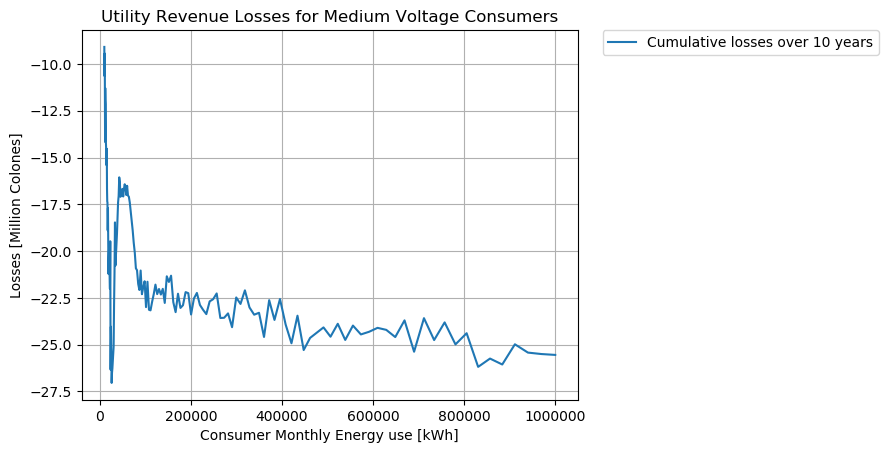

In [10]:
plot(consumption_tmt, cumulative_impact_tmt, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers")
grid("on");

## Commercial Consumers - Alternative System
#### Generate Data and plot basic results. 

In [11]:
commercial.tariff = A_CI_CNFL
consumption_comind = consumption = exp10.(range(2.7, stop=4, length=150))
ui_comind = []
ui_data_comind = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_comind)
    Result = Dict{String,Any}()
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(commercial, PVComInd_opt, SD);
    ui_data_comind[ix] = Result  
end

In [12]:
cumulative_impact_comind = [sum(ui_data_comind[ix]["Impact"])./1e6 for (ix, co) in enumerate(consumption_comind)];

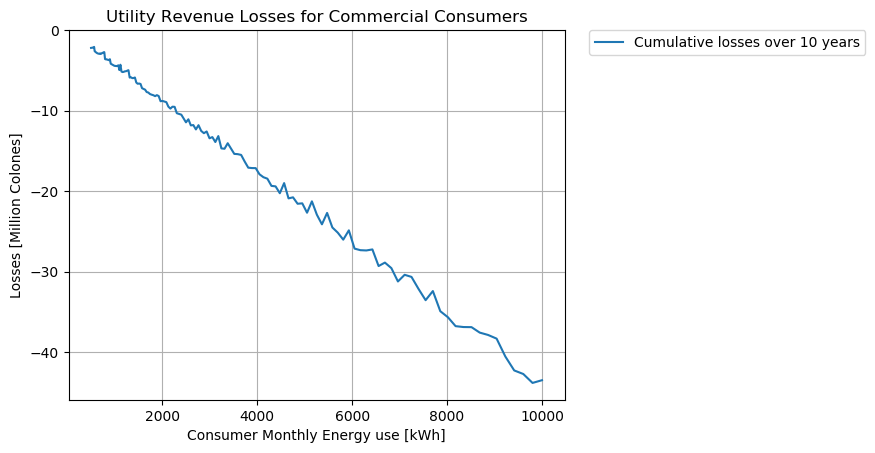

In [13]:
plot(consumption_comind, cumulative_impact_comind, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers")
grid("on");

## Medium Voltage Consumers - Alternative System
#### Generate Data and plot basic results.

In [14]:
mediumvoltage.tariff = A_TMT_CNFL
consumption_tmt = exp10.(range(4, stop=6, length=150))
ui_tmt = []
ui_data_tmt = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_tmt)
    Result = Dict{String,Any}()
    mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(mediumvoltage, PVTMT_opt, SD);
    ui_data_tmt[ix] = Result  
end

In [15]:
cumulative_impact_tmt = [sum(ui_data_tmt[ix]["Impact"])./1e6 for (ix, co) in enumerate(consumption)];

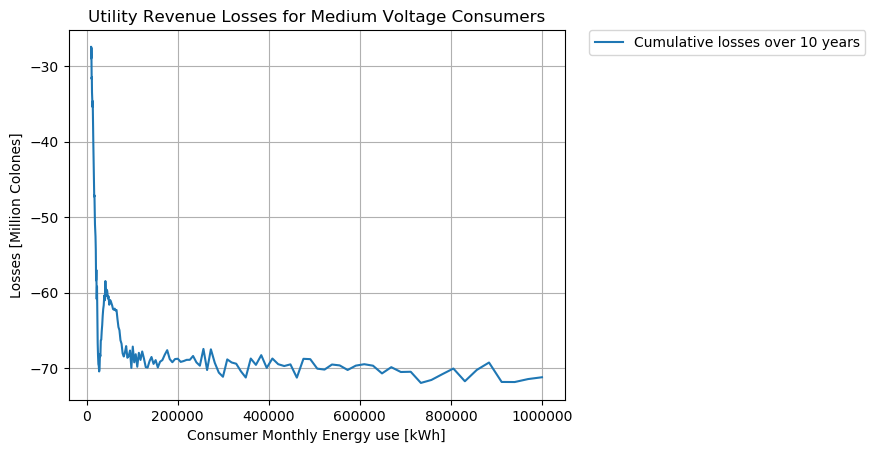

In [16]:
plot(consumption_tmt, cumulative_impact_tmt, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers")
grid("on");